# Tujuan Model

Ditujukan untuk menghasilkan model prediktif (*multiple linear regression*) untuk melakukan prediksi terhadap penjualan pie (`pie_sales`) berdasarkan fitur *independet* (`week`, `price`, `advertising`).

# Import Library & Data 

## Libraries


LIbrary yang akan digunakan
*   Pandas
*   Numpy
* matplotlib.pyplot
* seaborn
* plotly express
* plotly graph object
* statsmodels.api 
* sklearn linear model




In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



## Data 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


Melihat informasi yang ada pada dataset, seperti jumlah *entry*/baris, jumlah kolom, tipe data setiap kolom, serta *memory*:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


Semua kolom/fitur bertipe numerik, yang berarti dapat langsung digunakan dalam pembuatan model regresi linear. Juga tidak ada *missing values* pada dataset. 

Melihat deskripsi statistik numerik pada data:

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
week,15.0,8.000000,4.472136,1.0,4.5,8.0,11.50,15.0
pie_sales,15.0,399.333333,63.523524,300.0,350.0,430.0,450.00,490.0
price,15.0,6.613333,1.171609,4.5,5.7,7.0,7.50,8.0
advertising,15.0,3.480000,0.488730,2.7,3.1,3.5,3.85,4.5


# Exploratory Data Analysis

Pada *section* ini, akan dilakukan visualisasi terhadap data sehingga dapat di-*extract* beberapa *insight* secara deskriptif dari data.

## Distribusi Fitur

In [5]:
df.columns

Index(['week', 'pie_sales', 'price', 'advertising'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

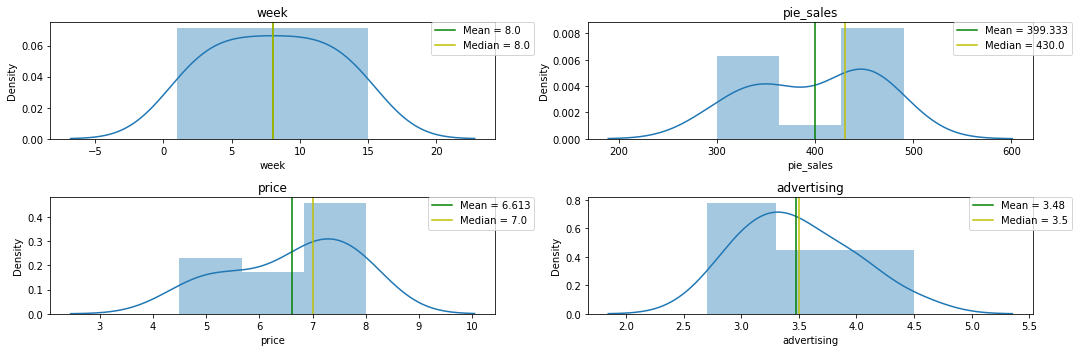

In [20]:
plt.figure(figsize=(15,5))
for i in range(len(df.columns)):
  plt.subplot(2, 2, i+1)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.axvline(df[df.columns[i]].mean(), label='Mean = {}'.format(round(df[df.columns[i]].mean(),3)), color='g')
  plt.axvline(df[df.columns[i]].median(), label='Median = {}'.format(round(df[df.columns[i]].median(),3)), color='y')
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  
plt.tight_layout();

Melihat hubungan dari masing-masing fitur yang berisi variabel variabel independen terhadap variabel dependen. Apakah memiliki relasi yang linear atau tidak?

In [134]:
week_piesales = px.scatter(
    df,
    x = 'week', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template = 'seaborn',
    title = 'Regression fit: Week vs Pie sales'
)

price_piesales = px.scatter(
    df,
    x = 'price', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template = 'seaborn',
    title = 'Regression fit: Price vs Pie sales'
)

advertising_piesales = px.scatter(
    df,
    x = 'advertising', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template= 'seaborn',
    title = 'Regression fit: Advertising vs Pie sales'
)

## Week - Pie Sales

In [133]:
week_piesales_line = go.Figure()
week_piesales_line.add_trace(go.Scatter(x=df['week'], y=df['pie_sales'],
                    mode='lines+markers'))
week_piesales_line.update_layout(title='Total pie terjual per minggu',
                   xaxis_title='Week',
                   yaxis_title='Pie Sales')

In [135]:
week_piesales

## Price - Pie Sales

In [136]:
price_piesales

## Advertising - Pie Sales

In [137]:
advertising_piesales

# Split Data (Independent(Xs) dan Dependent(y))

In [103]:
y = df['pie_sales']
X = df[['price','advertising']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Model Training

## Menggunakan Scikit-learn LinearRegression

In [104]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print('Coefficient (m) = ', regressor.coef_)
print('Intercept (b) = ', regressor.intercept_)

Coefficient (m) =  [-26.17250718  75.66278583]
Intercept (b) =  306.0709478818248


## Menggunakan Statsmodels

In [45]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:09:16   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



# Evaluasi Model (Scikit-learn)

In [106]:
y_predict = regressor.predict(X_test)
y_predict

array([327.15291937, 359.46433727, 415.28302306, 382.44864659])

In [107]:
y_test

14    300
1     460
6     430
10    340
Name: pie_sales, dtype: int64

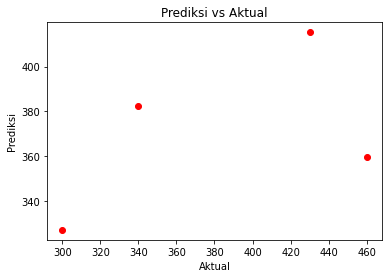

In [108]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Prediksi')
plt.xlabel('Aktual')
plt.title('Prediksi vs Aktual');

In [109]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs( (y_test-y_predict) / y_test  )  )*100

In [110]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  56.708 
MSE = 3215.7943794485604 
MAE = 46.2135514067125 
R2 = 0.237737628575156 
Adjusted R2 = -1.286787114274532 
MAPE = 11.703500202358564


# Visualisasi Hasil

In [121]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(df['advertising'].min(),
                                         df['price'].max(), 100),  
                                         np.linspace(df['advertising'].min(), 
                                                     df['price'].max(), 100))

In [126]:
onlyX = pd.DataFrame({'advertising': x_surf.ravel(), 'price':y_surf.ravel()} ) 
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Pie Sales')

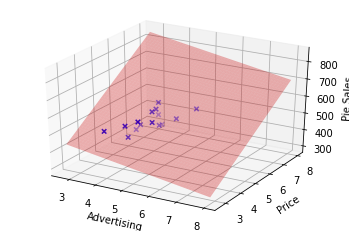

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['advertising'], df['price'] , df['pie_sales'] , c = 'blue', marker ='x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Advertising')
ax.set_ylabel('Price')
ax.set_zlabel('Pie Sales')

Dari angel yang berbeda:

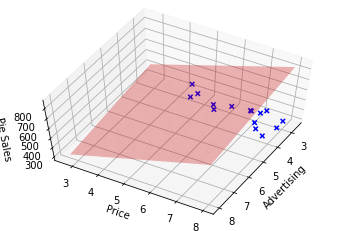

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['advertising'],df['price'],df['pie_sales'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Advertising')
ax.set_ylabel('Price')
ax.set_zlabel('Pie Sales')
ax.view_init(60, 30)
plt.show()